<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/0_Analytics_in_a_Nutshell_Exploratory_Data_Analysis_%26_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Analytic Technology 

## Introduction: 
This notebook provides you with an example of the type of analysis we are looking to perform in python over the next several weeks. 

## Setting up your environment: 

Depending on route you choose (I recomend colabratory)  you might need to install python and additional packages. To install Python locally go to [Anaconda.com](https://www.anaconda.com/products/distribution) and download and install a release of python to your computer. 

## Example Problem:

You are the owner of a small coffee shop chain and you want to improve your customer retention. You have a dataset of customer transactions over the past year, including the date of each transaction, the amount spent, and whether or not the customer has made a purchase in the past 90 days. Your goal is to build a model that can predict whether a customer is likely to make a purchase in the next 90 days, based on their past transaction history.


To solve this problem we are going to perform the following:

### Exploratory data analysis: 
Start by exploring the data to get a better understanding of the patterns and trends in customer behavior. Use plots and charts to visualize the data, and compute summary statistics to identify key features of the data.

### Data cleaning and preprocessing: 
Before building a model, you will need to clean and prepare the data. This might include handling missing values, formatting the data correctly, and selecting relevant features for the model.

### Modeling and evaluation: 
Use machine learning techniques to build a model that can predict whether a customer is likely to make a purchase in the next 90 days. You might try a variety of different models (such as a decision tree, a random forest, or a logistic regression) and compare their performance to choose the best one.

## Validation and implementation: 
Once you have chosen a model, you will need to validate it on a separate test dataset to ensure that it is robust and generalizable. If the model performs well, you can implement it in your business to help improve customer retention.
- accuracy
- precision
- recall 

The idea is that, this problem is  simple enough to be approachable for a student with little or no programming experience,  unique and practical, allowing the student to apply their knowledge of business and marketing to a real-world problem.

lets get started! 

## Load Libraries

A Python library is a collection of functions and methods that allows you to perform many actions without writing your own code. Libraries are typically built to provide a set of related functionality and are intended to be used as a tool for software development. Some examples of popular Python libraries include:

- NumPy: a library for numerical computing with Python
- Pandas: a library for data manipulation and analysis
- Matplotlib & seaborn: libraries for data visualization
- SciPy: a library for scientific and technical computing
- scikit-learn: a library for machine learning in Python
- requests: a library for making HTTP requests in Python
- beautifulsoup: a library for parsing and navigating HTML and XML documents

There are many other libraries available for specific tasks, such as image processing, natural language processing, and more. Python libraries are often distributed as packages, which are simply collections of Python modules that can be easily installed and imported into your code.

Aliasing a library like Pandas with a shorter name, such as "pd", is a common practice in Python because it allows you to use the library more easily and concisely in your code. For example, instead of writing "pandas" every time you want to use a Pandas function or method, you can simply write "pd". This can save a lot of typing and make your code more readable.

For example, instead of writing:
```python
import pandas

df = pandas.read_csv("data.csv")
```

You can write:

```python
import pandas as pd

df = pd.read_csv("data.csv")
```

Using aliases for libraries is completely optional, but it is a common convention in the Python community. You can use any alias you like, as long as it is a valid Python identifier.

In [26]:
# data 
import pandas as pd

# plotting 
import matplotlib.pyplot as plt
import seaborn as sns 

# modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# supress warnings 
import warnings
warnings.filterwarnings('ignore')

# make sure to plot things in the notebook 
%matplotlib inline

## Import Data

Here our data is located in a github repository, so we'll import it from the internet. 

In [4]:
coffee = pd.read_csv("https://github.com/MonkeyWrenchGang/MGTPython/blob/main/module_1/data/coffee_100k.csv?raw=true")
coffee.head()

,purchase_last_90days_amount,instore_yn,coupon_yn,purchase_last_90days,product_name,transaction_timestamp,email_address,target_next_90days
0,1816.0,No,No,Yes,Seasonal drink: Happy Holidays hot chocolate,2022-12-10 07:51:14,anthony92@yahoo.com,No
1,3070.0,No,No,Yes,Gourmet Beans: Columbian Medium Roast,2022-11-26 19:34:05,patrick11@hotmail.com,No
2,3031.0,No,Yes,Yes,Drip coffee: Our Old Time Diner Blend Sm,2022-08-13 19:15:50,bradyrobert@gmail.com,No
3,2626.0,No,Yes,Yes,Organic brewed coffee: Brazilian Lg,2022-01-23 06:13:32,chenlisa@gmail.com,No
4,5934.0,Yes,No,Yes,Barista Espresso: CappucciNo Lg,2022-12-29 06:00:25,fstewart@yahoo.com,Yes


## Describe Data

you can't take the mean of a category so we deal with categorical data differently than numeric. Lets see this in action.

In [5]:
# Select only the categorical columns
categorical_columns = coffee.select_dtypes(include=['object', 'category'])

# Generate summary statistics for the categorical columns
categorical_columns.describe()



,instore_yn,coupon_yn,purchase_last_90days,product_name,transaction_timestamp,email_address,target_next_90days
count,100000,100000,100000,100000,100000,100000,100000
unique,2,2,2,87,99828,85912,2
top,No,Yes,Yes,Housewares: I Need My Bean! Latte cup,2022-09-24 06:30:02,rsmith@yahoo.com,No
freq,68130,59102,73002,4391,2,15,79131


In [6]:
# Select only the categorical columns
numeric_columns = coffee.select_dtypes(include=['int', 'float'])

# Generate summary statistics for the categorical columns
numeric_columns.describe()

,purchase_last_90days_amount
count,100000.000000
mean,5610.645700
std,1457.758694
min,100.000000
25%,4453.000000
50%,6022.500000
75%,6695.000000
max,9999.000000


## Clean up purchase_last_90days_amount

clearly purchase_last_90days_amount is way off, it turns out we need to divide it by 100 lets see this in action.

In [7]:
coffee["purchase_last_90days_amount"] = coffee["purchase_last_90days_amount"]/100
coffee.head()

,purchase_last_90days_amount,instore_yn,coupon_yn,purchase_last_90days,product_name,transaction_timestamp,email_address,target_next_90days
0,18.16,No,No,Yes,Seasonal drink: Happy Holidays hot chocolate,2022-12-10 07:51:14,anthony92@yahoo.com,No
1,30.70,No,No,Yes,Gourmet Beans: Columbian Medium Roast,2022-11-26 19:34:05,patrick11@hotmail.com,No
2,30.31,No,Yes,Yes,Drip coffee: Our Old Time Diner Blend Sm,2022-08-13 19:15:50,bradyrobert@gmail.com,No
3,26.26,No,Yes,Yes,Organic brewed coffee: Brazilian Lg,2022-01-23 06:13:32,chenlisa@gmail.com,No
4,59.34,Yes,No,Yes,Barista Espresso: CappucciNo Lg,2022-12-29 06:00:25,fstewart@yahoo.com,Yes


## Explore! 

1. The first question is *what percentage of customers will make a purchase in the next 90 days, based on their past transaction history* ? 

2. Is the distribution of previous 90 day transaction amount likely to have any influence customers making a purchae in the next 90 days? 

  - purchase_last_90days_amount X target_next_90days purchase yes / no? 

3. If a customer uses a coupon at their last visit, are they likely to make another purchase in next 90 days?

4. Does the last product purchased have any influence on a customer's likelyhood of  purhcase in next 90 days? 

## 1. what percentage of customers will make a purchase in the next 90 days, based on their past transaction history.

In pandas, the **value_counts** function is a way to gernate frequency counts of a single column. The **value_counts**  function returns the counts of unique values, which can be "normalized" to percentages. The result is always in descending order so that the most frequently-occurring element comes first.



In [8]:
coffee["target_next_90days"].value_counts()

No     79131
Yes    20869
Name: target_next_90days, dtype: int64

In [15]:
coffee["target_next_90days"].value_counts(normalize=True)

No     0.79131
Yes    0.20869
Name: target_next_90days, dtype: float64

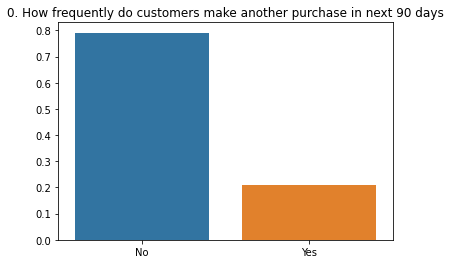

In [27]:
freq = coffee["target_next_90days"].value_counts(normalize=True)

sns.barplot(freq.index, freq.values)
plt.title("0. How frequently do customers make another purchase in next 90 days")
plt.show()

we can see that about 20% of customers are returning in the next 90 days. 

## 2. Is the distribution of previous 90 day transaction amount likely to have any influence customers making a purchae in the next 90 days?

There are lots of ways to analyze previous 90 day transactoin amount and its relationship to next 90 day purchaes, one way is to use a Boxplot. A boxplot or a whisker plot, is used to summarize the distribution of numeric data. It displays a summary of the central tendency, dispersion, and skewness of the data, and is useful for identifying outliers and for comparing the distribution of data across different groups or conditions. In our case the likelyhood of making a purchase in the next 90 days. 


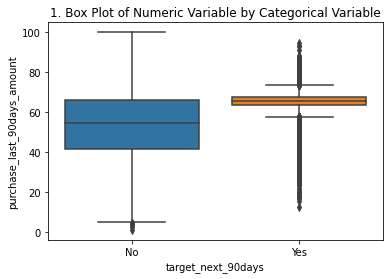

In [9]:

# Create a box plot
sns.boxplot(data=coffee, x="target_next_90days", y="purchase_last_90days_amount")
# Add a title and show the plot
plt.title("2. Box Plot of Numeric Variable by Categorical Variable")
plt.show()

The chart above shows that purchase amount over the last 90 days has some influence on the likelyhood that a user will purchase in the next 90 days. on average if you spend more over the previous 90 days you are likely to spend in the next 90 - is one way to think about it. 

## 3. If a customer uses a coupon at their last visit, are they likely to make another purchase in next 90 days?

here we have two categorical varaibles, to analyze this we might want to summarize the data into a percentage of coupon use Yes / No by make a purchase in next 90 days Yes / No. Let's see how we might do this. 

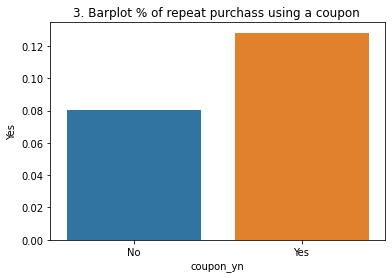

In [28]:
# first summarize the data 
q3 = pd.crosstab(coffee["coupon_yn"],coffee["target_next_90days"],normalize=True).reset_index()
# then plot it
sns.barplot(data=q3, x="coupon_yn", y="Yes")
# Add a title and show the plot
plt.title("3. Barplot % of repeat purchass using a coupon ")
plt.show()

So 12% of all repeat 90 day customers use a coupon so likely a coupon is helpful in identifying repeat customers. 

## 4. Does the last product purchased have any influence on a customer's likelyhood of  purhcase in next 90 days? 

Here we are going to do a similar stunt,  but this time we'll tally the percentage of repeat customers by product name. Then identify the % of repeat customers by product name. If you break this down, you'll see wen eed to we need to filter infrequent product purchases like "Scone: Ginger Scone	" which was bought 5 times in the last 90 days. to do this we'll limit our analysis ot productgs that have been purchased at least 500 times in the last 90 days. 

In [41]:
q4 = pd.crosstab(coffee["product_name"],coffee["target_next_90days"],normalize=False).reset_index()
q4["PCT_Yes"] = q4["Yes"]/(q4["Yes"]+q4["No"])
q4 = q4.query('(Yes + No) > 500')
q4 = q4.sort_values("PCT_Yes", ascending=False).reset_index(drop=True)
q4

target_next_90days,product_name,No,Yes,PCT_Yes
0,Scone: Jumbo Savory Scone,10,509,0.980732
1,Brewed Black tea: Earl Grey Lg,20,497,0.961315
2,Black tea: English Breakfast,32,522,0.942238
3,Brewed Chai tea: Traditional Blend Chai Lg,39,493,0.926692
4,Brewed Black tea: English Breakfast Rg,47,490,0.912477
5,Espresso Beans: Primo Espresso Roast,65,476,0.879852
6,Pastry: Croissant,92,458,0.832727
7,Barista Espresso: Espresso shot,170,404,0.703833
8,Scone: Scottish Cream Scone,217,340,0.610413
9,Clothing: I Need My Bean! T-shirt,276,332,0.546053


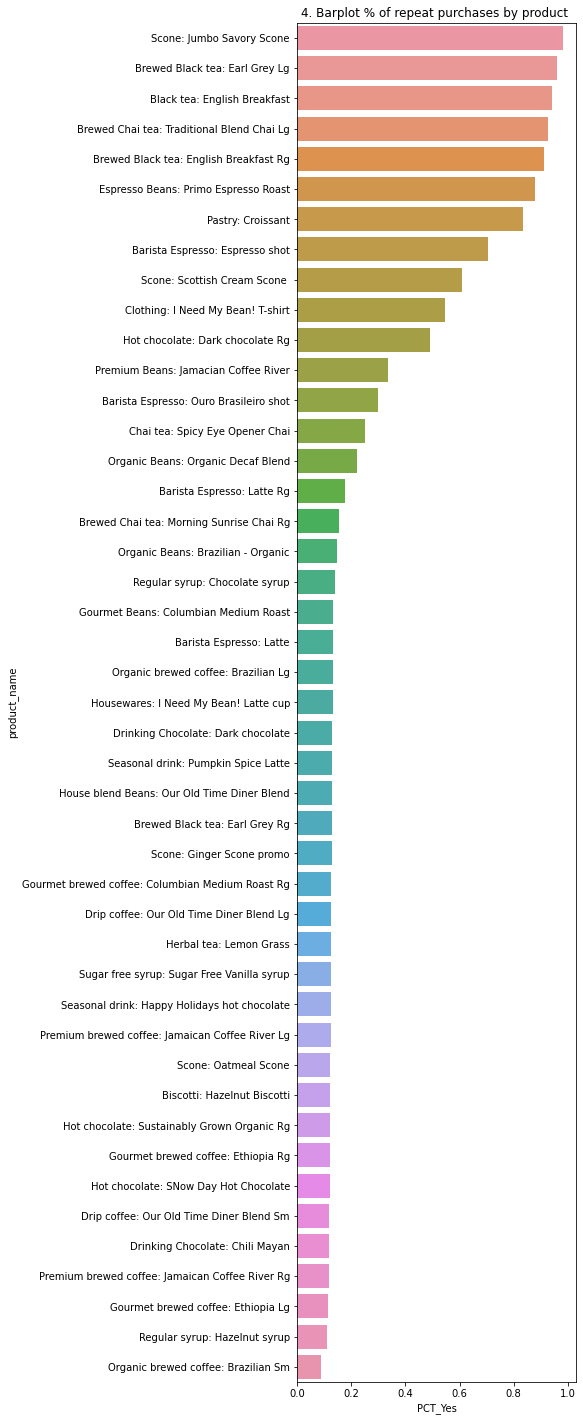

In [42]:
plt.figure(figsize=(5,25))
sns.barplot(data=q4, y="product_name", x="PCT_Yes")
# Add a title and show the plot
plt.title("4. % of repeat purchases by product ")
plt.show()

So clearly some products are liklely indicative of repeat cusotmers while others not so much. 

## Data cleaning and preprocessing:
Before building a model, you will need to clean and prepare the data. This might include handling missing values, formatting the data correctly, and selecting relevant features for the model.

here we need to re-map the target to a numeric 1=Yes 0 = No. 

and turn all strings into 0/1s this is called dummy encoding. 

In [63]:
coffee_prep = coffee.copy()
coffee_prep["target_next_90days"] = coffee_prep["target_next_90days"].map({
    "Yes":1,
    "No":0
})

coffee_prep = pd.concat([coffee_prep[["target_next_90days","purchase_last_90days_amount"]], 
                         pd.get_dummies(coffee[['coupon_yn', 
                                                'instore_yn',	
                                                'purchase_last_90days',	
                                                'product_name'
                                                ]])], 
                        axis=1)
coffee_prep.head()

,target_next_90days,purchase_last_90days_amount,coupon_yn_No,coupon_yn_Yes,instore_yn_No,instore_yn_Yes,purchase_last_90days_No,purchase_last_90days_Yes,product_name_Barista Espresso: CappucciNo,product_name_Barista Espresso: CappucciNo Lg,...,product_name_Scone: Ginger Scone,product_name_Scone: Ginger Scone promo,product_name_Scone: Jumbo Savory Scone,product_name_Scone: Oatmeal Scone,product_name_Scone: Scottish Cream Scone,product_name_Seasonal drink: Happy Holidays hot chocolate,product_name_Seasonal drink: Pumpkin Spice Latte,product_name_Seasonal drink: Pumpkin Spice Latte Lg,product_name_Specialty coffee: Rio Nights,product_name_Sugar free syrup: Sugar Free Vanilla syrup
0,0,18.16,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,30.70,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,30.31,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,26.26,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,59.34,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Select the features and target variable
X = coffee_prep.drop(columns="target_next_90days")
y = coffee_prep['target_next_90days']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)



DecisionTreeClassifier()

In [65]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

y_test.array

<PandasArray>
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 ...
 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Length: 20000, dtype: int64

In [66]:
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, recall_score

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the precision, accuracy, and recall
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("-- model performance --")
print("Precision: {:.2f}".format(precision))
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))

Precision: 0.86
Accuracy: 0.94
Recall: 0.85


Accuracy, precision, and recall are all metrics that are used to evaluate the performance of a machine learning model. These metrics are often used in the context of classification tasks, where the goal is to predict the class of an input data point. In our case which customers are likely to make a purchase in the next 90 days. 

**Accuracy** is the fraction of correct predictions made by the model. It is the ratio of the number of correct predictions to the total number of predictions made. Accuracy is a good measure to use when the classes are balanced, i.e., when there are roughly the same number of examples in each class.

- the challenge here is that by saying no one will make a purchase in the next 90 days we'd be correct 80% of the time. Here the model is better and is correct 94% of the time. 

**Precision** is the fraction of true positive predictions made by the model. It is the ratio of true positives to the sum of true positives and false positives. Precision is a good measure to use when the goal is to minimize false positives, i.e., when the cost of a false positive is high.

- Here when we flag someone as likely to purchase in the next 90 days we are correct 86% of the time.

**Recall** is the fraction of true positive predictions that the model was able to make. It is the ratio of true positives to the sum of true positives and false negatives. Recall is a good measure to use when the goal is to minimize false negatives, i.e., when the cost of a false negative is high.

- of the customers who return what % of those do we identify? Recall: 0.85 or 85% of repeat customers. pretty darn good. 


*It is important to note that these metrics are often in trade-off with each other. Increasing the precision of a model generally results in a decrease in recall, and vice versa.* 


